In [ ]:
from Model import Model
import Parameters
import datetime
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import pandas as pd
import Util

In [ ]:
def moving_average_compare(data):
    return Util.moving_average(data[0,0:,:])

In [ ]:
def moving_average_compare_vaccine(data, index):
    return Util.moving_average(data[index,0:,:])

In [ ]:
def compute_sdd(act, predict):
    difference = act - predict
    return np.sum(np.square(difference))

In [ ]:
infectiousness = 0.15
# infectiousness = 0.15
m1 = Model(forecast_days=0, infectiousness=infectiousness)
m2 = Model(forecast_days=0, infectiousness=infectiousness, prior_immunity=0)
start_date = datetime.datetime(2020, 1, 15)
m1.date = 712
#m1.date = 712?

# Pre-run plotting

In [ ]:
ground_truth_data = m2._model_data
immunity = moving_average_compare(ground_truth_data.time_series_immunity)
vaccinated1 = moving_average_compare_vaccine(ground_truth_data.time_series_vaccinated, 0)
vaccinated2 = moving_average_compare_vaccine(ground_truth_data.time_series_vaccinated, 1)
vaccinated3 = moving_average_compare_vaccine(ground_truth_data.time_series_vaccinated, 2)
plt.figure(figsize=(15,4))
plt.subplot()
plt.subplot(1,3,1), plt.plot([Parameters.OUTBREAK_FIRST_DAY + datetime.timedelta(days=j) for j in range(1066)], np.mean(vaccinated1, axis=1)), plt.title('vaccine 1')
plt.subplot(1,3,2), plt.plot([Parameters.OUTBREAK_FIRST_DAY + datetime.timedelta(days=j) for j in range(1066)], np.mean(vaccinated2, axis=1)), plt.title('vaccine 2')
plt.subplot(1,3,3), plt.plot([Parameters.OUTBREAK_FIRST_DAY + datetime.timedelta(days=j) for j in range(1066)], np.mean(vaccinated3, axis=1)), plt.title('vaccine 3')
print((ground_truth_data.time_series_vaccinated).shape)

In [ ]:
plt.figure(figsize=(15,4))
plt.plot([Parameters.OUTBREAK_FIRST_DAY + datetime.timedelta(days=j) for j in range(3000)], m1.dependency.mobility)

### Waning kernels

In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(1, 4, 1), plt.plot(Parameters.get_immunity_kernel(dose=0))
plt.subplot(1, 4, 2), plt.plot(Parameters.get_immunity_kernel(dose=1))
plt.subplot(1, 4, 3), plt.plot(Parameters.get_immunity_kernel(dose=2))
plt.subplot(1, 4, 4), plt.plot(Parameters.get_immunity_kernel(dose=3))

# Compute immunity!

In [ ]:
# for i in range(1072):
#     m1._compute_immunity(i)
#     if i % 200 == 10:
#
#         x = [Parameters.OUTBREAK_FIRST_DAY + datetime.timedelta(days=j) for j in range(1072)]
#         for j in range(16):
#             slice = m1._model_data.time_series_immunity[0].T[j].T
#             plt.plot(x, slice, label=j)
#         plt.legend()
#         plt.xticks(rotation=45, ha='right')
#         plt.title('Predicted immunity')
#         plt.show()
#     m2.print_data(m1.date)

## Run the model

Coefficient [0.82412443 0.51872128 0.42053636 0.27835689 0.19075532 0.18179057
 0.14977411 0.14333676 0.12413954 0.12464753 0.13483463 0.13853114
 0.10697232 0.10464152 0.12929955 0.17738745]
RAW_IMMUNITY [0.17587557 0.48127872 0.57946364 0.72164311 0.80924468 0.81820943
 0.85022589 0.85666324 0.87586046 0.87535247 0.86516537 0.86146886
 0.89302768 0.89535848 0.87070045 0.82261255]
Mobility [1.1   0.8   0.605 0.895]
Coefficient [0.82412443 0.51872128 0.42053636 0.27835689 0.19075532 0.18179057
 0.14977411 0.14333676 0.12413954 0.12464753 0.13483463 0.13853114
 0.10697232 0.10464152 0.12929955 0.17738745]
RAW_IMMUNITY [0.17587557 0.48127872 0.57946364 0.72164311 0.80924468 0.81820943
 0.85022589 0.85666324 0.87586046 0.87535247 0.86516537 0.86146886
 0.89302768 0.89535848 0.87070045 0.82261255]
Mobility [1.1   0.8   0.605 0.895]
Coefficient [0.82447471 0.51917357 0.42069616 0.27853497 0.19191151 0.18300459
 0.15119772 0.14482041 0.12574045 0.12631284 0.13660137 0.14036987
 0.10886469 0.

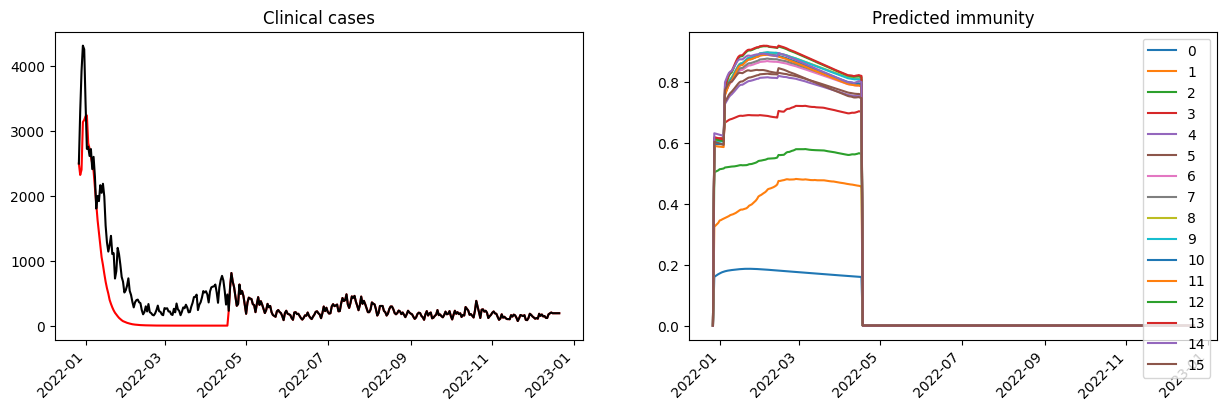

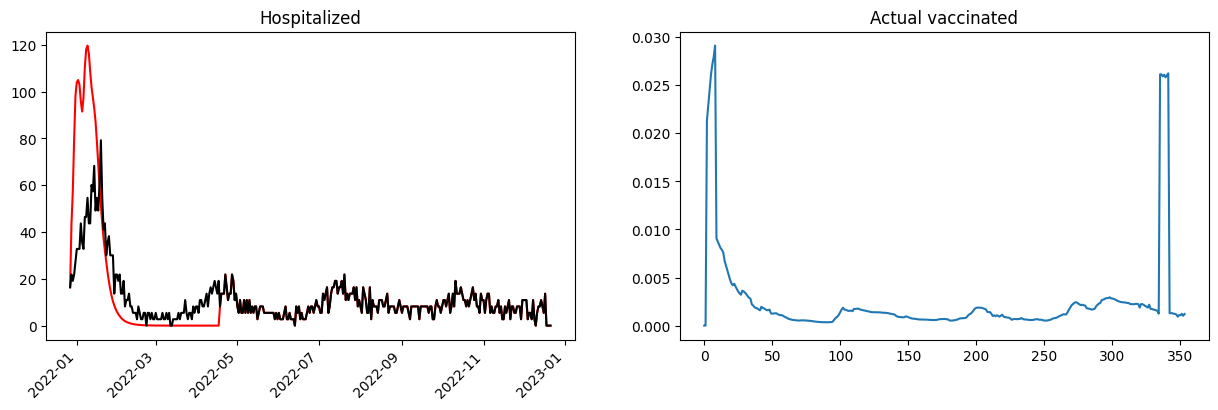

Coefficient [0.84021553 0.54225984 0.43388831 0.29611394 0.24825541 0.24129845
 0.21360251 0.20804075 0.19114466 0.19326817 0.20671894 0.21371837
 0.1840177  0.17979367 0.19969321 0.25265885]
RAW_IMMUNITY [0.15978447 0.45774016 0.56611169 0.70388606 0.75174459 0.75870155
 0.78639749 0.79195925 0.80885534 0.80673183 0.79328106 0.78628163
 0.8159823  0.82020633 0.80030679 0.74734115]
Mobility [1.13  0.8   0.505 0.915]
Coefficient [0.84021553 0.54225984 0.43388831 0.29611394 0.24825541 0.24129845
 0.21360251 0.20804075 0.19114466 0.19326817 0.20671894 0.21371837
 0.1840177  0.17979367 0.19969321 0.25265885]
RAW_IMMUNITY [0.15978447 0.45774016 0.56611169 0.70388606 0.75174459 0.75870155
 0.78639749 0.79195925 0.80885534 0.80673183 0.79328106 0.78628163
 0.8159823  0.82020633 0.80030679 0.74734115]
Mobility [1.13  0.8   0.505 0.915]
Coefficient [0.84053477 0.5433176  0.43485946 0.29725018 0.24969583 0.24275916
 0.21514156 0.20959804 0.19273738 0.19488762 0.20835995 0.21542367
 0.18582909 0.

In [ ]:
for i in range(1072-m1.date-1):
    m1.run_one_cycle(display_status=False)
    if i % 50 == 10:

        x = [Parameters.OUTBREAK_FIRST_DAY + datetime.timedelta(days=j+712) for j in range(360)]
        plt.figure(figsize=(15,4))
        plt.subplot()
        plt.subplot(1, 2, 1)
        plt.plot(x, np.sum((m1._model_data.time_series_clinical_cases[0])[712:], axis=1), color='red')
        plt.plot(x, np.sum((m2._model_data.time_series_clinical_cases[0])[712:], axis=1), color='black')
        plt.xticks(rotation=45, ha='right')
        plt.title('Clinical cases')
        plt.subplot(1, 2, 2)
        for j in range(16):
            slice = m1._model_data.time_series_immunity[0].T[j].T
            plt.plot(x, slice[712:], label=j)
        plt.legend()
        plt.xticks(rotation=45, ha='right')
        plt.title('Predicted immunity')
        plt.show()

        plt.figure(figsize=(15,4))
        plt.subplot()
        plt.subplot(1, 2, 1)
        plt.plot(x, np.sum((m1._model_data.time_series_hospitalized[0])[712:], axis=1), color='red')
        plt.plot(x, np.sum((m2._model_data.time_series_hospitalized[0])[712:], axis=1), color='black')
        plt.title('Hospitalized')
        plt.xticks(rotation=45, ha='right')
        plt.subplot(1, 2 ,2), plt.plot(np.mean(moving_average_compare_vaccine(m1._model_data.time_series_vaccinated, 2)[712:], axis=1)), plt.title('vaccine 3')
        plt.title('Actual vaccinated')
        plt.show()
    # m2.print_data(m1.date)

In [ ]:
predicated_data = m1._model_data
ground_truth_clinical = moving_average_compare(m2._model_data.time_series_clinical_cases)
predicted_clinical = moving_average_compare(predicated_data.time_series_clinical_cases)
print(compute_sdd(ground_truth_clinical, predicted_clinical))

In [ ]:
x = [Parameters.OUTBREAK_FIRST_DAY + datetime.timedelta(days=j) for j in range(1066)]

plt.figure(figsize=(15,4))
plt.subplot()
plt.subplot(1, 2, 1), plt.plot(x, ground_truth_clinical)
plt.xticks(rotation=45, ha='right')
plt.subplot(1, 2, 2), plt.plot(x, predicted_clinical)
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
ground_truth_deaths = moving_average_compare(m2._model_data.time_series_deaths)
predicted_deaths = moving_average_compare(m1._model_data.time_series_deaths)
print(compute_sdd(ground_truth_deaths, predicted_deaths))

In [ ]:
plt.figure(figsize=(15,4))
plt.subplot()
plt.subplot(1, 2, 1), plt.plot(ground_truth_deaths)
plt.subplot(1, 2, 2), plt.plot(predicted_deaths)
plt.show()

In [ ]:
ground_truth_hosp = moving_average_compare(m2._model_data.time_series_hospitalized)
predicted_hosp = moving_average_compare(m1._model_data.time_series_hospitalized)
print(compute_sdd(ground_truth_hosp, predicted_hosp))

In [ ]:
plt.figure(figsize=(15,4))
plt.subplot()
plt.subplot(1, 2, 1), plt.plot(ground_truth_hosp)
plt.subplot(1, 2, 2), plt.plot(predicted_hosp)
plt.show()

In [ ]:
ground_truth_icu = moving_average_compare(m2._model_data.time_series_ICU)
predicted_icu = moving_average_compare(m1._model_data.time_series_ICU)
print(compute_sdd(ground_truth_icu, predicted_icu))

In [ ]:
plt.figure(figsize=(15,4))
plt.subplot()
plt.subplot(1, 2, 1), plt.plot(ground_truth_icu)
plt.subplot(1, 2, 2), plt.plot(predicted_icu)
plt.show()

In [ ]:
print(np.sum(m2._model_data.time_series_deaths))

In [ ]:
immunity = moving_average_compare(m1._model_data.time_series_immunity)
vaccine = moving_average_compare(m1._model_data.time_series_vaccinated)
plt.figure(figsize=(15,4))
plt.subplot()
plt.subplot(1, 2, 1), plt.plot(immunity)
plt.subplot(1, 2, 2), plt.plot(vaccine)

In [ ]:

plt.plot(np.sum(m1._model_data.time_series_vaccinated[0], axis=0).T, label=i)
plt.plot(np.sum(m1._model_data.time_series_vaccinated[1], axis=0).T, label=i)
plt.plot(np.sum(m1._model_data.time_series_vaccinated[2], axis=0).T, label=i)
plt.legend()
plt.show()

In [ ]:
for i in range(16):
    slice = m1._model_data.time_series_immunity[0].T[i].T
    plt.plot(slice, label=i)
plt.legend()
plt.show()

In [ ]:

slice = m1._model_data.time_series_vaccinated[0].T[15].T
plt.plot(slice, color='black')
slice = m1._model_data.time_series_vaccinated[0].T[14].T
slice = m1._model_data.time_series_vaccinated[0].T[13].T
slice = m1._model_data.time_series_vaccinated[0].T[12].T
slice = m1._model_data.time_series_vaccinated[0].T[11].T
plt.plot(slice)
plt.show()

In [ ]:
for i in range(16):
    slice = m1._model_data.time_series_active_cases[0].T[5].T
    plt.plot(slice, label=i)
plt.legend()
plt.show()

In [ ]:
m1.save_to_file()